##Decision Tree

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import sklearn 
import seaborn as ana
import matplotlib.pyplot as plt

Ket.Oulook
1=Sunny
2=Overcast
3=Rainy

In [ ]:
df = pd.read_excel('golf.xlsx')
df

,Outlook,Temperature,Humidity,Wind,Play
0,1,85,85,0,no
1,1,80,90,1,no
2,2,83,78,0,yes
3,3,68,80,0,yes
4,3,65,70,1,no
5,2,64,65,1,yes
6,1,72,95,0,no
7,1,69,70,0,yes
8,3,75,80,0,yes
9,1,75,70,1,yes


In [ ]:
X=df.drop('Play',axis=1) #drop Label/Output
Y=df.Play

In [ ]:
#kita pisahkan datanya (split)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5) #maksudnya test_size yaitu 50% data pengujian dan 50% data pelatihan

In [ ]:
#Pembuatan Model
dt=DecisionTreeClassifier()

In [ ]:
#Sekarang kita lakukan Training data
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(200.88000000000002, 190.26, 'X[1] <= 76.0\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(133.92000000000002, 135.9, 'X[1] <= 67.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 92.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

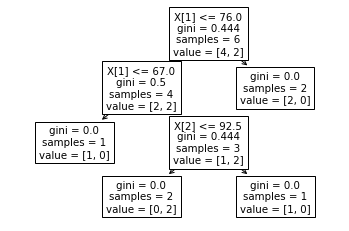

In [ ]:
#Tampilkan tree
tree.plot_tree(dt)

In [ ]:
#prediksi
Y_pred=dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print ('Akurasi:',accuracy_score(Y_test,Y_pred))

Akurasi: 0.5714285714285714


In [ ]:
print ('Hasil:',classification_report(Y_test,Y_pred))

Hasil:               precision    recall  f1-score   support

          no       0.50      1.00      0.67         3
         yes       1.00      0.25      0.40         4

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7



##Manual ID3

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Golf.xls to Golf.xls


In [157]:
data = pd.read_excel("Golf.xls")
data.head()

,No,Play,Outlook,Temperature,Humidity,Windy
0,1,no,sunny,85,85,False
1,2,no,sunny,80,90,True
2,3,yes,overcast,83,78,False
3,4,yes,rain,70,96,False
4,5,yes,rain,68,80,False


In [158]:
data.drop(["No","Temperature", "Humidity"], axis = 1, inplace = True)
data.head()

,Play,Outlook,Windy
0,no,sunny,False
1,no,sunny,True
2,yes,overcast,False
3,yes,rain,False
4,yes,rain,False


In [154]:
from info_gain import info_gain

ig = info_gain.info_gain(data["Play"],data["Outlook"])
iv = info_gain.intrinsic_value(data["Play"],data["Outlook"])
igr= info_gain.info_gain_ratio(data["Play"],data["Outlook"])

print(ig, iv, igr)

0.17103394188032706 1.5774062828523452 0.10842732385410238


In [170]:
color_obj = data["Outlook"].unique()
color_obj

array(['sunny', 'overcast', 'rain'], dtype=object)

In [189]:
data_atr = data.columns
feature = data_atr[1:3]
feature

Index(['Outlook', 'Windy'], dtype='object')

In [190]:
IGR = []

In [191]:
#Perulangan pada igr
for i in feature:
  print(i)
  temp_igr= info_gain.info_gain_ratio(data["Play"],data[i])
  IGR.append(temp_igr)

Outlook
Windy


In [192]:
IGR 
#Outlook memiliki igr paling tinggi

[0.10842732385410238, 0.033859280116067446]